<a href="https://colab.research.google.com/github/Jpsama1236/DL_specialization/blob/master/JP_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Netflix TV shows views .

# Problem Statement


Netfix is a video streaming company where shows keep on coming in weekly basis or weekend basis, and they keep on running just like how your TV shows goes on. Now, recently they noticed a problem.  The problem was that when they launchs a particular show, the show TRP was very good and they were making a lot of revenue out of it, because a lot of users were interested and kind of going through that particular stuff, but suddenly, they started noticing a decline into that show. So, they were interested to find out whether or what can be the possible reasons, because of which their show viewership have decreased, and what actions they can take to fix that. 

This is a multiple regression model case and we have to build a perfect model to know what are the particular factors/columns which are impacting the viewership and to predict its views in the future.

In [ ]:
import seaborn as sns
import pandas as pd


In [ ]:
data=pd.read_excel('/content/mediacompany.csv.xlsx')

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-01-03 00:00:00,183738,1260228,1706478,1060860448,0,0
1,2017-02-03 00:00:00,193763,1270561,1690727,1031846645,0,0
2,2017-03-03 00:00:00,210479,1248183,1726157,1010867575,0,0
3,2017-04-03 00:00:00,240061,1492913,1855353,1079194579,1,0
4,2017-05-03 00:00:00,446314,1594712,2041418,1357736987,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [ ]:
data.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [ ]:
data.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [ ]:
data.duplicated().sum()

0

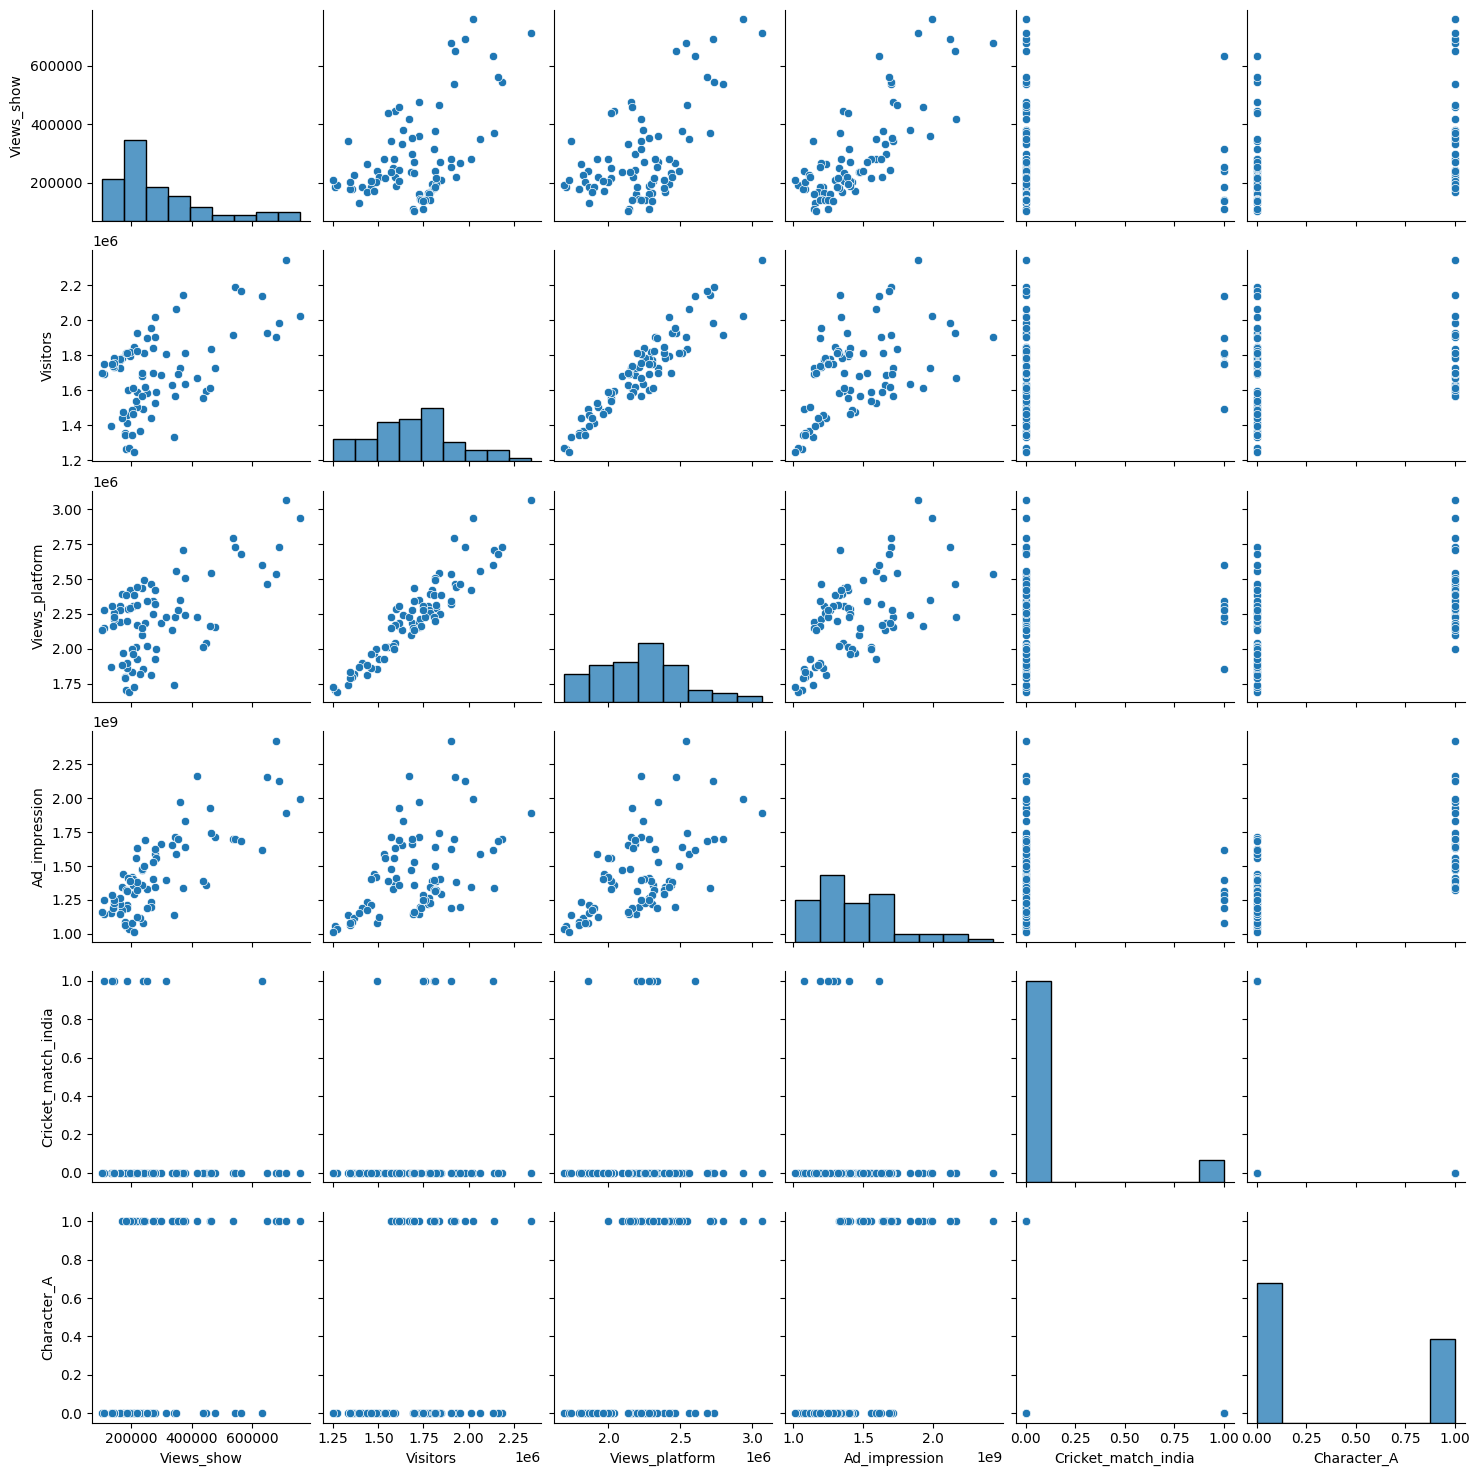

In [ ]:
sns.pairplot(data)

<ipython-input-130-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

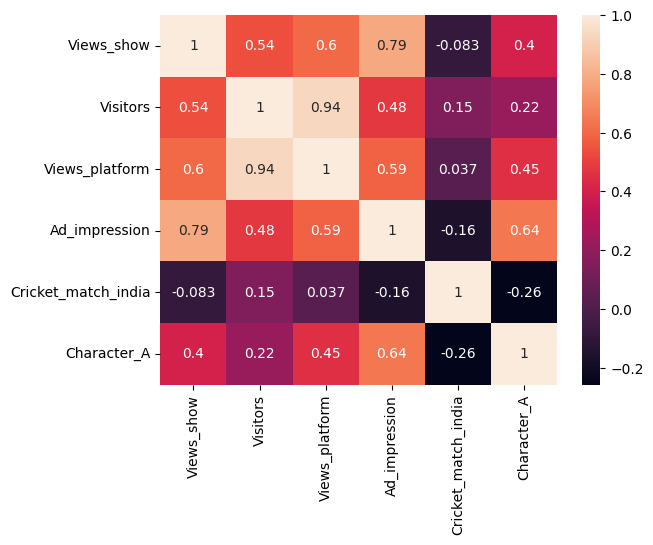

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='Ad_impression', ylabel='Views_show'>

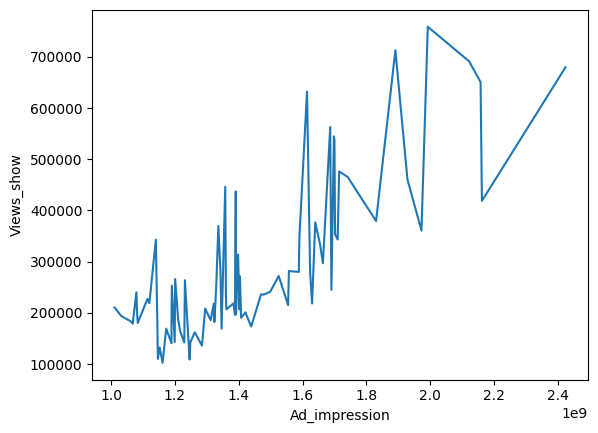

In [ ]:
sns.lineplot(y='Views_show',x='Ad_impression',data=data)

<Axes: xlabel='Visitors', ylabel='Views_show'>

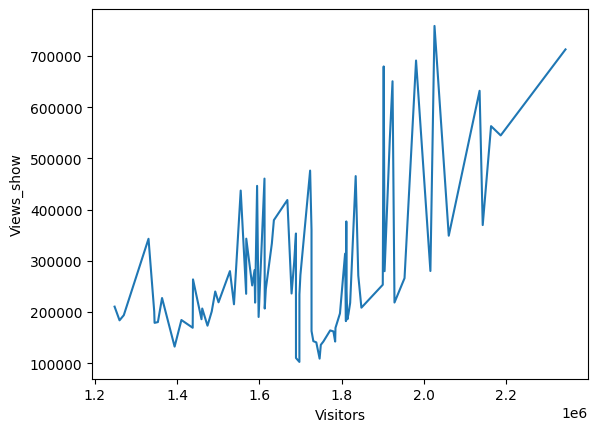

In [ ]:
sns.lineplot(y='Views_show',x='Visitors',data=data)

<Axes: xlabel='Views_platform', ylabel='Views_show'>

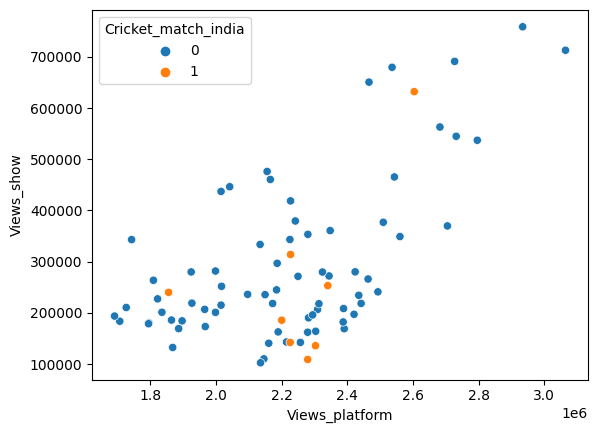

In [ ]:
sns.scatterplot(x='Views_platform',y='Views_show',data=data,hue='Cricket_match_india')

<Axes: xlabel='Views_platform', ylabel='Views_show'>

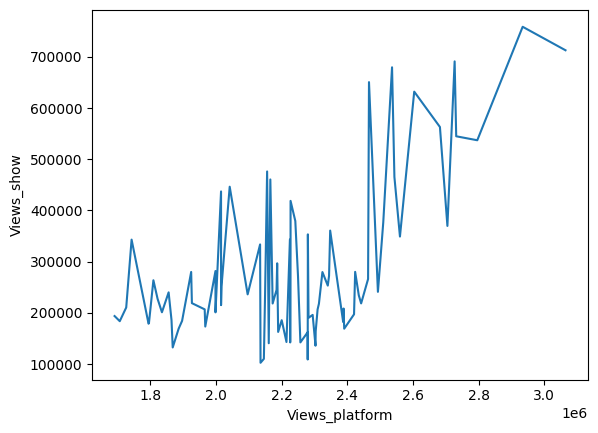

In [ ]:
sns.lineplot(x='Views_platform',y='Views_show',data=data)

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-01-03 00:00:00,183738,1260228,1706478,1060860448,0,0
1,2017-02-03 00:00:00,193763,1270561,1690727,1031846645,0,0
2,2017-03-03 00:00:00,210479,1248183,1726157,1010867575,0,0
3,2017-04-03 00:00:00,240061,1492913,1855353,1079194579,1,0
4,2017-05-03 00:00:00,446314,1594712,2041418,1357736987,0,0


In [ ]:
data['date']=pd.to_datetime(data['Date'])

In [ ]:
data.tail(20)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date
60,4/30/2017,544814,2187064,2731451,1698345214,0,0,2017-04-30
61,2017-01-05 00:00:00,279700,1904704,2323887,1623666951,0,0,2017-01-05
62,2017-02-05 00:00:00,196026,1816855,2294150,1388283566,0,0,2017-02-05
63,2017-03-05 00:00:00,162150,1780230,2278880,1262254571,0,0,2017-03-05
64,2017-04-05 00:00:00,143112,1731468,2214359,1199377174,0,0,2017-04-05
65,2017-05-05 00:00:00,140666,1738676,2160395,1189257839,0,0,2017-05-05
66,2017-06-05 00:00:00,280065,2016144,2423599,1342773863,0,0,2017-06-05
67,2017-07-05 00:00:00,562943,2163629,2681882,1686752144,0,0,2017-07-05
68,2017-08-05 00:00:00,271341,1840748,2249542,1403797010,0,0,2017-08-05
69,2017-09-05 00:00:00,217791,1821016,2313219,1321700567,0,0,2017-09-05


In [ ]:
data['month']=data['date'].dt.month

In [ ]:
data.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date,month
0,2017-01-03 00:00:00,183738,1260228,1706478,1060860448,0,0,2017-01-03,1
1,2017-02-03 00:00:00,193763,1270561,1690727,1031846645,0,0,2017-02-03,2
2,2017-03-03 00:00:00,210479,1248183,1726157,1010867575,0,0,2017-03-03,3
3,2017-04-03 00:00:00,240061,1492913,1855353,1079194579,1,0,2017-04-03,4
4,2017-05-03 00:00:00,446314,1594712,2041418,1357736987,0,0,2017-05-03,5


In [ ]:
data.sort_values('month')

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date,month
0,2017-01-03 00:00:00,183738,1260228,1706478,1060860448,0,0,2017-01-03,1
61,2017-01-05 00:00:00,279700,1904704,2323887,1623666951,0,0,2017-01-05,1
31,2017-01-04 00:00:00,296772,1684842,2186053,1663798844,0,1,2017-01-04,1
1,2017-02-03 00:00:00,193763,1270561,1690727,1031846645,0,0,2017-02-03,2
62,2017-02-05 00:00:00,196026,1816855,2294150,1388283566,0,0,2017-02-05,2
...,...,...,...,...,...,...,...,...,...
10,2017-11-03 00:00:00,218956,1500926,1926280,1119900035,0,0,2017-11-03,11
41,2017-11-04 00:00:00,272079,1700031,2344060,1525321166,0,1,2017-11-04,11
72,2017-12-05 00:00:00,102520,1697576,2135342,1161183285,0,0,2017-12-05,12
42,2017-12-04 00:00:00,190287,1598403,2281562,1407426028,0,1,2017-12-04,12


In [ ]:
data.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

<Axes: xlabel='month', ylabel='Views_show'>

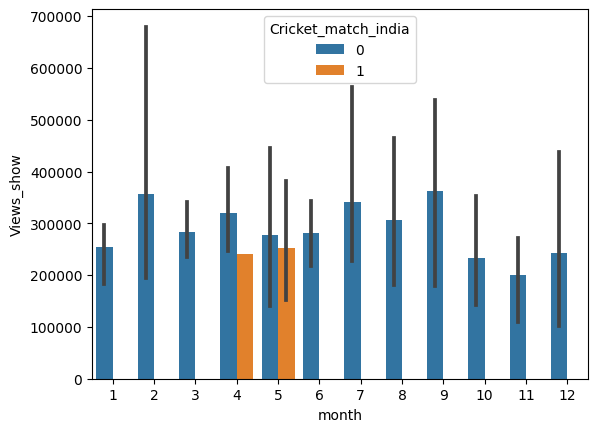

In [ ]:
sns.barplot(x='month',y='Views_show',data=data,hue='Cricket_match_india')

<Axes: xlabel='Views_show', ylabel='Count'>

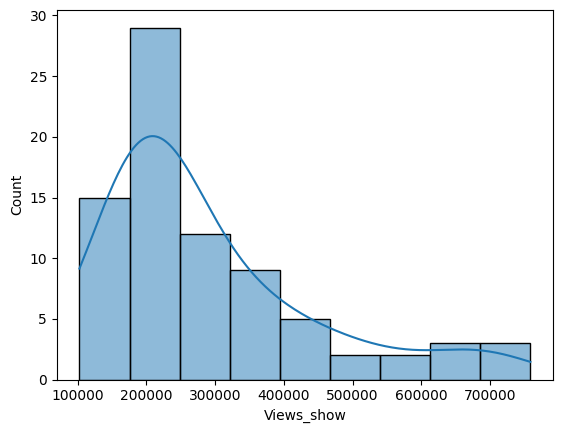

In [ ]:
sns.histplot(x='Views_show',data=data,kde=True)

<Axes: xlabel='month', ylabel='Ad_impression'>

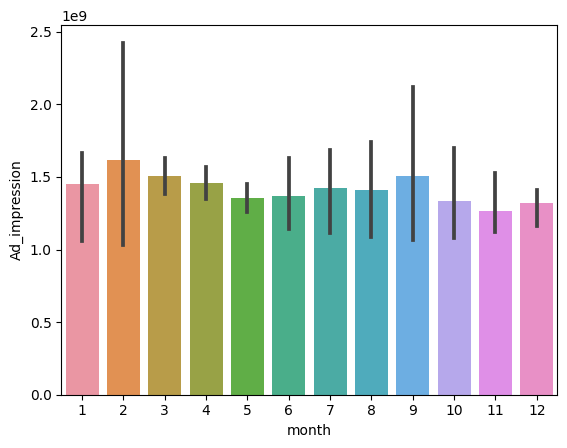

In [ ]:
sns.barplot(x='month',y='Ad_impression',data=data)

In [ ]:
# may be in the last 10-12th month of 2017 the adds were not very good, the impressions for them is going down trend. This could be one of the reason.

In [ ]:
data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'date', 'month'],
      dtype='object')

In [ ]:
data['Character_A'].unique()

array([0, 1])

<Axes: xlabel='month', ylabel='Views_show'>

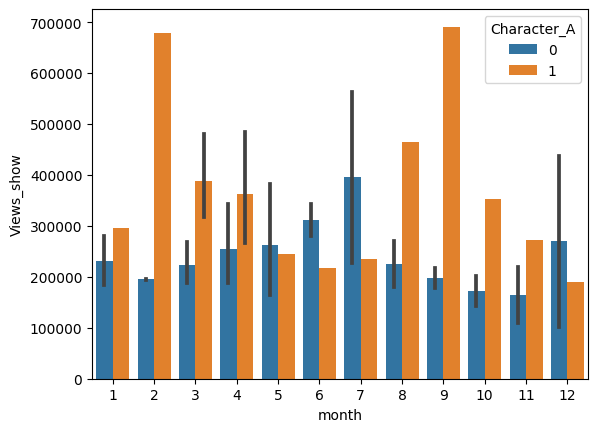

In [ ]:
sns.barplot(x='month',y='Views_show',data=data,hue='Character_A')

<Axes: xlabel='month', ylabel='Views_show'>

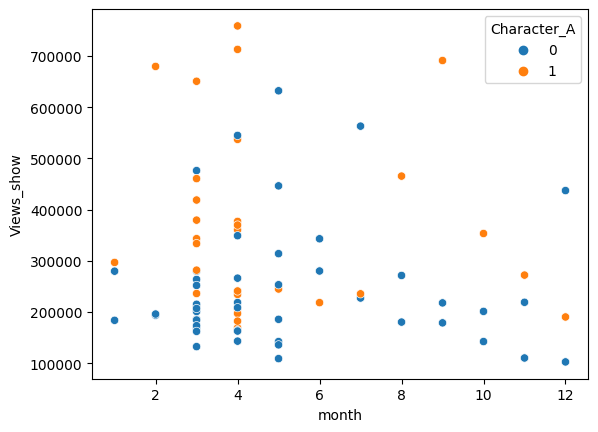

In [ ]:
sns.scatterplot(x='month',y='Views_show',data=data,hue='Character_A')

<Axes: xlabel='month', ylabel='Views_show'>

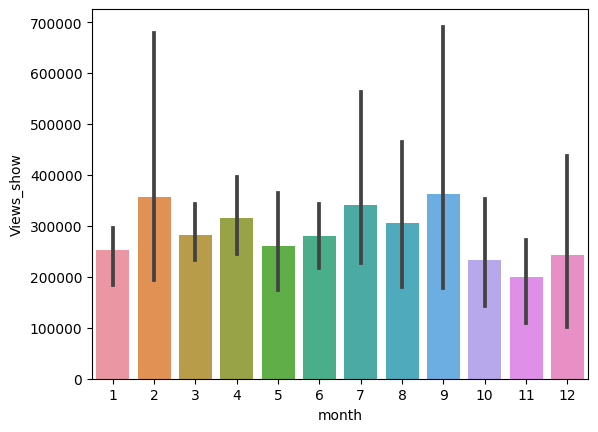

In [ ]:
sns.barplot(x='month',y='Views_show',data=data)

In [ ]:
# we can see with respect to character_A the views also kept decreasing in the end of the year 2017. may be it could also be the reason


<Axes: xlabel='month', ylabel='Views_show'>

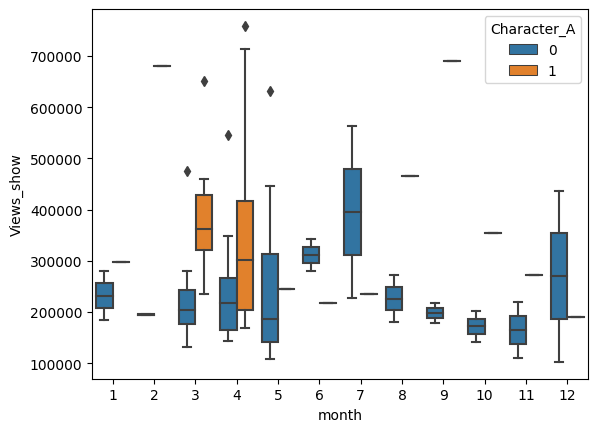

In [ ]:
sns.boxplot(x='month',y='Views_show',data=data,hue='Character_A')

<Axes: xlabel='month', ylabel='Views_show'>

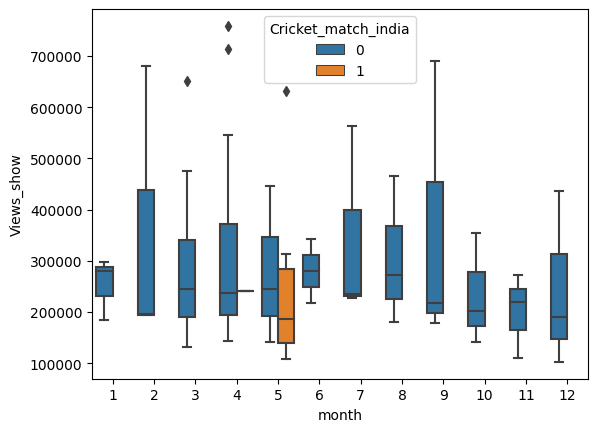

In [ ]:
sns.boxplot(x='month',y='Views_show',data=data,hue='Cricket_match_india')

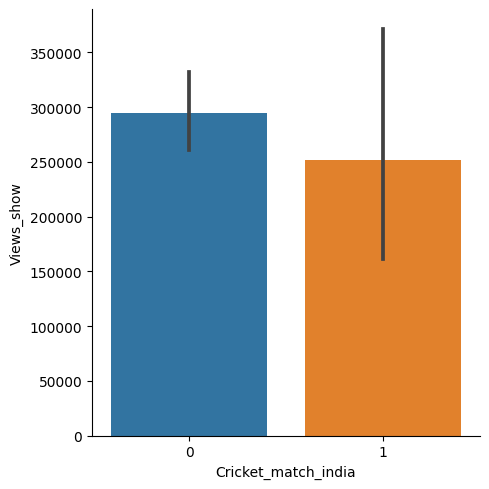

In [ ]:
sns.catplot(x='Cricket_match_india',y='Views_show',kind='bar',data=data)

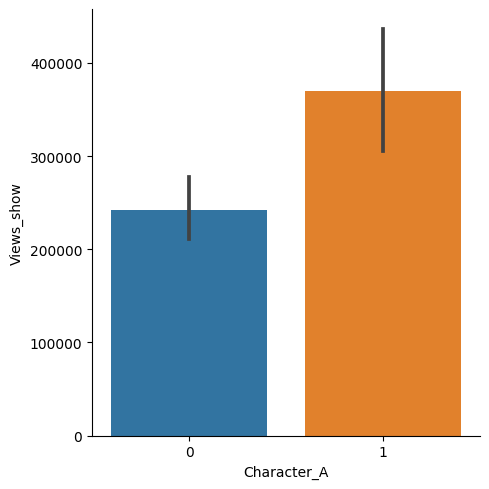

In [ ]:
sns.catplot(x='Character_A',y='Views_show',kind='bar',data=data)

In [ ]:
#viewership is more when character a is there. simply proved

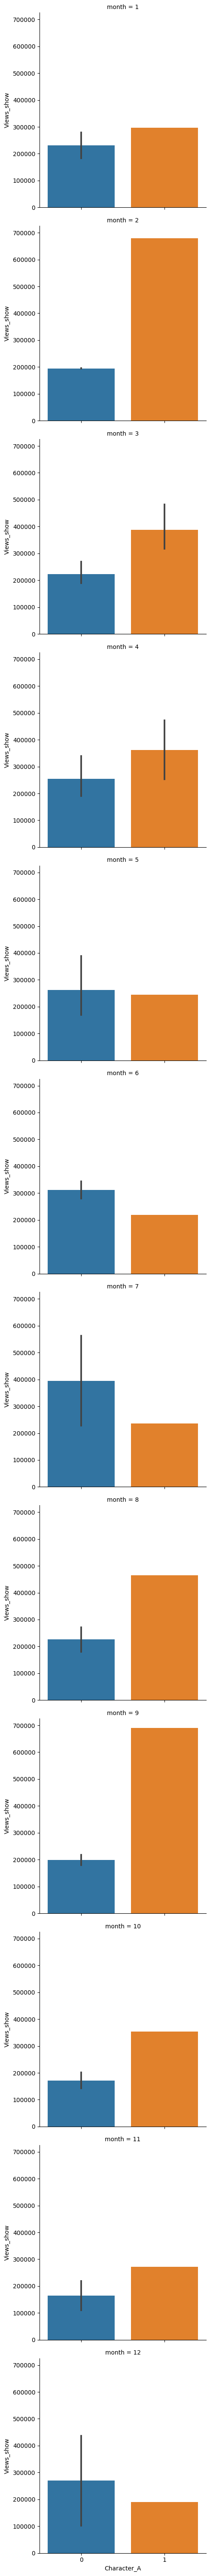

In [ ]:
sns.catplot(x='Character_A',y='Views_show',row='month',kind='bar',data=data)

In [ ]:
data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'date', 'month'],
      dtype='object')

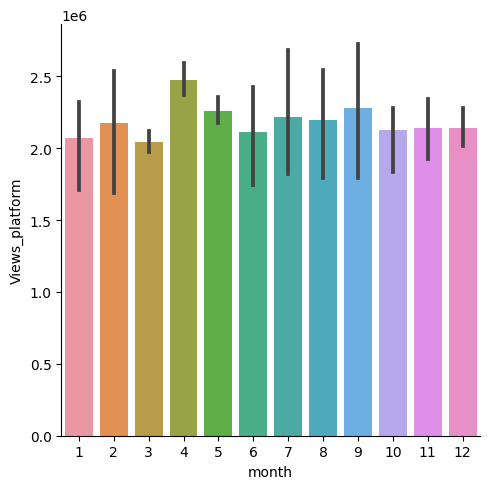

In [ ]:
sns.catplot(x='month',y='Views_platform',data=data,kind='bar')

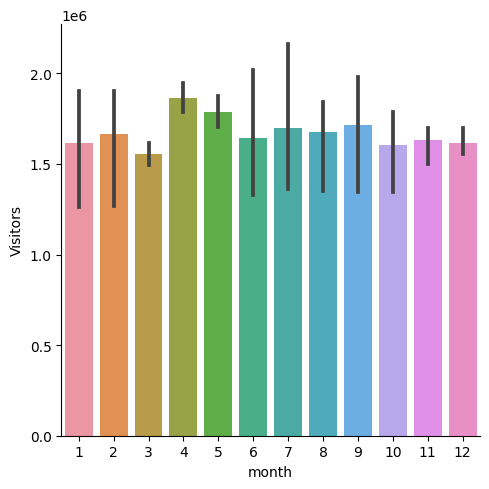

In [ ]:
sns.catplot(x='month',y='Visitors',data=data,kind='bar')

In [ ]:
data.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date,month
0,2017-01-03 00:00:00,183738,1260228,1706478,1060860448,0,0,2017-01-03,1
1,2017-02-03 00:00:00,193763,1270561,1690727,1031846645,0,0,2017-02-03,2
2,2017-03-03 00:00:00,210479,1248183,1726157,1010867575,0,0,2017-03-03,3
3,2017-04-03 00:00:00,240061,1492913,1855353,1079194579,1,0,2017-04-03,4
4,2017-05-03 00:00:00,446314,1594712,2041418,1357736987,0,0,2017-05-03,5
5,2017-06-03 00:00:00,342997,1330689,1742540,1140228426,0,0,2017-06-03,6
6,2017-07-03 00:00:00,227313,1363579,1821742,1113811802,0,0,2017-07-03,7
7,2017-08-03 00:00:00,180313,1353483,1795456,1083475096,0,0,2017-08-03,8
8,2017-09-03 00:00:00,178800,1345428,1794157,1067636147,0,0,2017-09-03,9
9,2017-10-03 00:00:00,201180,1344540,1834967,1081234843,0,0,2017-10-03,10


In [ ]:
data[data['month']==3]

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,date,month
2,2017-03-03 00:00:00,210479,1248183,1726157,1010867575,0,0,2017-03-03,3
12,3/13/2017,263638,1438887,1808967,1231295791,0,0,2017-03-13,3
13,3/14/2017,185896,1459500,1864134,1210330496,0,0,2017-03-14,3
14,3/15/2017,184346,1410668,1896352,1189319112,0,0,2017-03-15,3
15,3/16/2017,132409,1394130,1867785,1152287474,0,0,2017-03-16,3
16,3/17/2017,169225,1438125,1885937,1172698178,0,0,2017-03-17,3
17,3/18/2017,251851,1582773,2016477,1329477115,0,0,2017-03-18,3
18,3/19/2017,476130,1723653,2155393,1714732753,0,0,2017-03-19,3
19,3/20/2017,279880,1528669,1924030,1588375831,0,0,2017-03-20,3
20,3/21/2017,215077,1538487,2015064,1554738251,0,0,2017-03-21,3


In [ ]:
df_month=data.groupby('month')

In [ ]:
df_new=pd.DataFrame(df_month['Views_show'].sum(),columns=['Views_show']).reset_index()
df_new

,month,Views_show
0,1,760210
1,2,1069311
2,3,6215942
3,4,6643177
4,5,2603812
5,6,841364
6,7,1025764
7,8,917036
8,9,1087659
9,10,696774


<Axes: xlabel='month', ylabel='Views_show'>

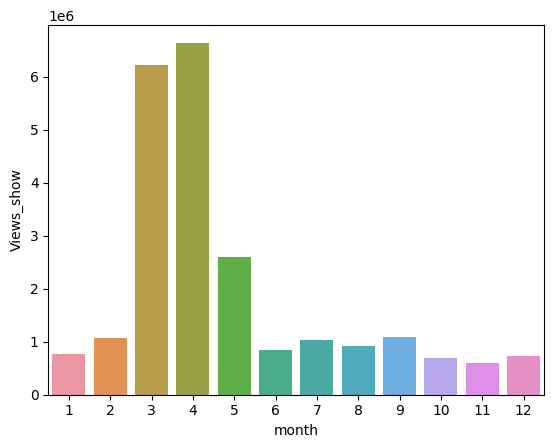

In [ ]:
sns.barplot(x='month',y='Views_show',data=df_new)

In [ ]:
data[data['month']==6]['Visitors'].sum()

4936674

In [ ]:
data[data['month']==6]['Views_show'].sum()

841364

In [ ]:
# platform vviews and visitors are similar and it is proportinal to no of vies of show. in 3 and 4 months nearly 3 crores visitors among them 60 lakh people watched show. remaining mmonths 
#the visistors are less, the show views are also less.may be another new app came.


In [ ]:
df=data.groupby(['month','Character_A'])

In [ ]:
df2=pd.DataFrame(df['Views_show'].sum()).reset_index()

In [ ]:
df2

,month,Character_A,Views_show
0,1,0,463438
1,1,1,296772
2,2,0,389789
3,2,1,679522
4,3,0,3112184
5,3,1,3103758
6,4,0,2296850
7,4,1,4346327
8,5,0,2358896
9,5,1,244916


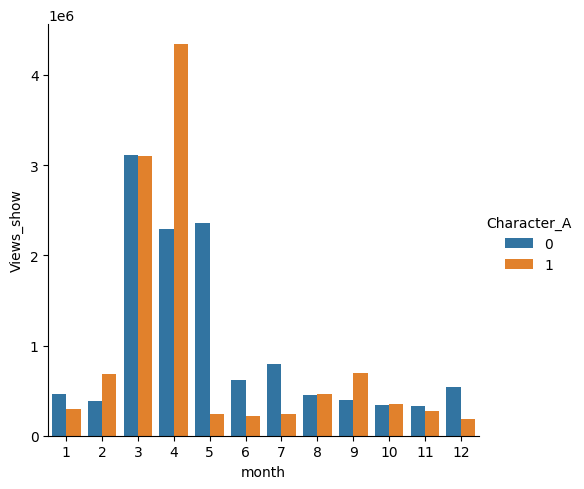

In [ ]:
sns.catplot(x='month',y='Views_show',hue='Character_A',kind='bar',data=df2)

In [ ]:
# As you can see the character A when it is having value 1, more viewership came to app.

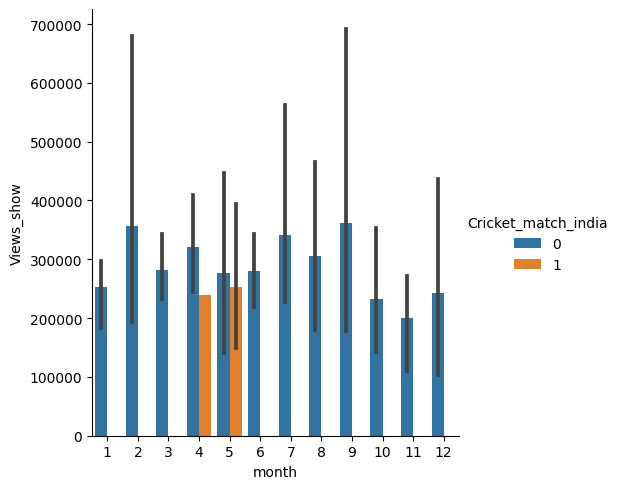

In [ ]:
sns.catplot(x='month',y='Views_show',hue='Cricket_match_india',kind='bar',data=data)

In [ ]:
#cricket match india is in 4 and 5 months where we had peak member ship in 4 th month, even after no mtches in india after 5 th month, we cant see the viewership growing, instead it declined.

In [ ]:
#training data now with multiple linear regression
data.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'date', 'month'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
df=pd.read_excel('/content/mediacompany.csv.xlsx')

In [ ]:
from sklearn.model_selection import train_test_split


df_train,df_test= train_test_split(df,train_size=0.7,test_size =0.3, random_state =100)
df_train=df_train.drop('Date',axis=1)
df_test=df_test.drop('Date',axis=1)

In [ ]:
df.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [ ]:
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df.columns[1:])
df_test=pd.DataFrame(scaler.fit_transform(df_test),columns=df.columns[1:])

In [ ]:
df_test

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,0.824428,0.737028,0.607041,1.000000,0.0,1.0
1,1.000000,0.863795,1.000000,0.841506,0.0,1.0
2,0.121327,0.609051,0.479003,0.199086,0.0,0.0
3,0.324742,0.000000,0.000000,0.025298,0.0,0.0
4,0.076643,0.332536,0.452431,0.281182,0.0,1.0
5,0.477654,0.278449,0.228733,0.265087,0.0,0.0
6,0.000000,0.497821,0.396024,0.081942,0.0,0.0
7,0.103519,0.162234,0.186918,0.276214,0.0,0.0
8,0.116918,0.258113,0.228745,0.422256,0.0,0.0
9,0.085966,0.603883,0.462997,0.262850,0.0,0.0


In [ ]:
ytrain=df_train['Views_show']
xtrain=df_train.drop(['Views_show'],axis=1)

In [ ]:
ytest=df_test['Views_show']
xtest=df_test.drop(['Views_show'],axis=1)

In [ ]:
xtest

,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,0.737028,0.607041,1.000000,0.0,1.0
1,0.863795,1.000000,0.841506,0.0,1.0
2,0.609051,0.479003,0.199086,0.0,0.0
3,0.000000,0.000000,0.025298,0.0,0.0
4,0.332536,0.452431,0.281182,0.0,1.0
5,0.278449,0.228733,0.265087,0.0,0.0
6,0.497821,0.396024,0.081942,0.0,0.0
7,0.162234,0.186918,0.276214,0.0,0.0
8,0.258113,0.228745,0.422256,0.0,0.0
9,0.603883,0.462997,0.262850,0.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
print(lr.intercept_)
print(lr.coef_)

-0.021189284646689455
[ 0.21383818  0.04524123  0.78050674 -0.07178272 -0.08314278]


In [ ]:
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(mean_squared_error(ytest,ypred))

0.027332163448530452


In [ ]:
ypred

array([ 0.86124272,  0.78242285,  0.28610789, -0.00144397,  0.20670973,
        0.25560442,  0.16713691,  0.23754541,  0.37392773,  0.33404654,
        0.35029462,  0.23643625,  0.42281951,  0.59582467,  0.17710452,
       -0.00944562,  0.25266383,  0.22953715,  0.09788658,  0.52743961,
        0.52906486,  0.52967653,  0.24610586,  0.8596621 ])

In [ ]:
ytest

0     0.824428
1     1.000000
2     0.121327
3     0.324742
4     0.076643
5     0.477654
6     0.000000
7     0.103519
8     0.116918
9     0.085966
10    0.208327
11    0.199789
12    0.325109
13    0.515630
14    0.103373
15    0.136797
16    0.087875
17    0.030930
18    0.195812
19    0.794208
20    0.523574
21    0.640009
22    0.150111
23    0.890234
Name: Views_show, dtype: float64

In [ ]:
print(lr.intercept_)
print(lr.coef_)

-0.021189284646689455
[ 0.21383818  0.04524123  0.78050674 -0.07178272 -0.08314278]


In [ ]:
xtrain.columns

Index(['Visitors', 'Views_platform', 'Ad_impression', 'Cricket_match_india',
       'Character_A'],
      dtype='object')